# 2110443 - Computer Vision (2018/1)
## Lab 2 - Basic Image Processing
In this lab, we will play with basic image pixel manipulation in grayscale images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

Import OpenCV, Numpy and Matplotlib as always

In [94]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
import json
%matplotlib inline

Use <a href="https://docs.opencv.org/3.4.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a>  function to read image from file in <b>grayscale</b> format and display its dimension

In [2]:
inputImage = cv2.imread("assets/lena_std.tif",cv2.IMREAD_GRAYSCALE)
print('inputImage variable data type =>', type(inputImage))
print('inputImage variable numpy data type =>', inputImage.dtype)
print('inputImage dimensions', inputImage.shape)
print(inputImage)

inputImage variable data type => <class 'numpy.ndarray'>
inputImage variable numpy data type => uint8
inputImage dimensions (512, 512)
[[144 144 146 ... 150 134 108]
 [144 144 146 ... 150 134 108]
 [144 144 146 ... 150 134 108]
 ...
 [ 38  38  44 ...  88  82  80]
 [ 39  39  48 ...  85  87  89]
 [ 39  39  48 ...  85  87  89]]


We need to specify matplotlib imshow <a href="https://matplotlib.org/tutorials/colors/colormaps.html">colormap</a> (cmap) as gray to display grayscale images.

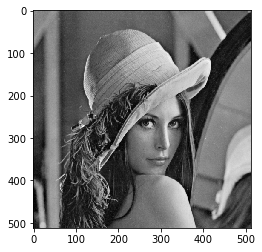

In [3]:
plt.imshow(inputImage, cmap='gray')
plt.show()

## Pixel Manipulation
You can use your old numpy knowledge here!

In [4]:
%%time
# Bad practice, you should not do this
inputImageTest = inputImage.copy()
for row in range(0,100):
    for col in range(0,inputImageTest.shape[1]):
        inputImageTest[row,col] = 255

CPU times: user 12 ms, sys: 470 µs, total: 12.4 ms
Wall time: 12.2 ms


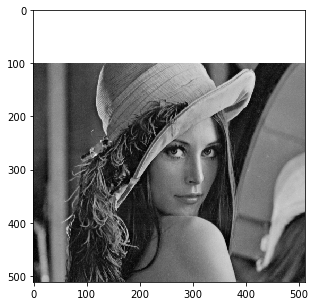

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(inputImageTest, cmap='gray')
plt.show()

In [6]:
%%time
# Vectorization version is a lot faster
inputImageTest = inputImage.copy()
inputImageTest[0:100,:] = 255

CPU times: user 64 µs, sys: 25 µs, total: 89 µs
Wall time: 58.2 µs


## Assignment 1 - Pixel Manipulation
Use the provided mask to crop the famous "Lena Soderberg" face. 
Hint: - Only <b>Basic</b> numpy knowledge is required here! 

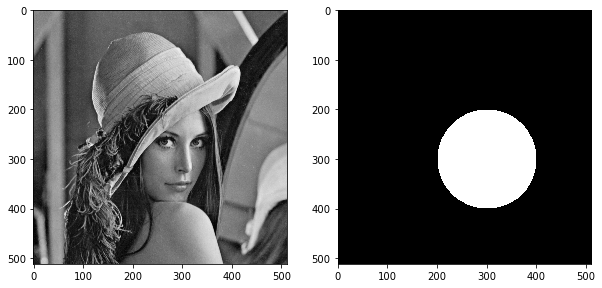

In [7]:
circleMask = np.zeros_like(inputImage)
cv2.circle(circleMask,(300,300), 100, (255),-1)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(inputImage, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(circleMask, cmap='gray')
plt.show()

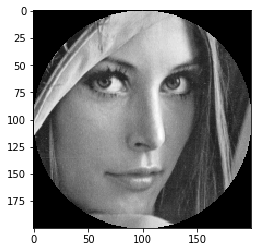

In [8]:
### FILL HERE ###
croppedImage = (inputImage * (circleMask / 255.0))[200:400, 200:400]
plt.imshow(croppedImage, cmap='gray')
#################

## Basic Image Filtering
OpenCV already provided us with a wide range of filtering operation. The most common one is image blurring which is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image.

### 1. Averaging using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37">cv2.blur</a> function.
Simply takes the average of all the pixels in the kernel area

In [9]:
def cv2Blur(kernelSize):
    blurImage = cv2.blur(inputImage,(kernelSize,kernelSize))
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2Blur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

### 2. Median Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">cv2.medianBlur</a>
Read the document and try to "mimic" the above interactive visualization!

In [10]:
### FILL HERE ###
def cv2MedianBlur(kernalSize):
    blurImage = cv2.medianBlur(inputImage,kernalSize)
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2MedianBlur, kernalSize = widgets.IntSlider(min=1,max=35,step=2,value=1))
#################

interactive(children=(IntSlider(value=1, description='kernalSize', max=35, min=1, step=2), Output()), _dom_cla…

<function __main__.cv2MedianBlur(kernalSize)>

### 3. Gaussian Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">cv2.GaussianBlur</a>
Gaussian blurring is highly effective in removing gaussian noise from the image.

In [11]:
def cv2GaussianBlur(kernelSize,sigmaX):
    gaussianBlurImage = cv2.GaussianBlur(inputImage,(kernelSize,kernelSize),sigmaX)
#     print(cv2.getGaussianKernel(kernelSize,sigmaX))
    plt.plot(range(kernelSize),cv2.getGaussianKernel(kernelSize,sigmaX))
    plt.figure(figsize=(5,5))
    plt.imshow(gaussianBlurImage, cmap='gray')
    plt.show()
interact(cv2GaussianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1),sigmaX=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), IntSlider(value=1, …

### 4. Bilateral Filter ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">cv2.bilateralFilter</a>
Read the document and try to "mimic" the above interactive visualization! 

In [12]:
### FILL HERE ###
def cv2BilateralFilter(d,sigmaColor,sigmaSpace): 
    filteredImage = cv2.bilateralFilter(inputImage,d,sigmaColor,sigmaSpace)
    plt.figure(figsize=(5,5))
    plt.imshow(filteredImage, cmap='gray')
    plt.show()
interact(cv2BilateralFilter,
        d = widgets.IntSlider(min=1,max=100,value=1),
        sigmaColor = widgets.IntSlider(min=1,max=100,value=1),
        sigmaSpace = widgets.IntSlider(min=1,max=100,value=1))
#################

interactive(children=(IntSlider(value=1, description='d', min=1), IntSlider(value=1, description='sigmaColor',…

<function __main__.cv2BilateralFilter(d, sigmaColor, sigmaSpace)>

### 5. Custom Kernel Filtering ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">cv2.filter2D</a>

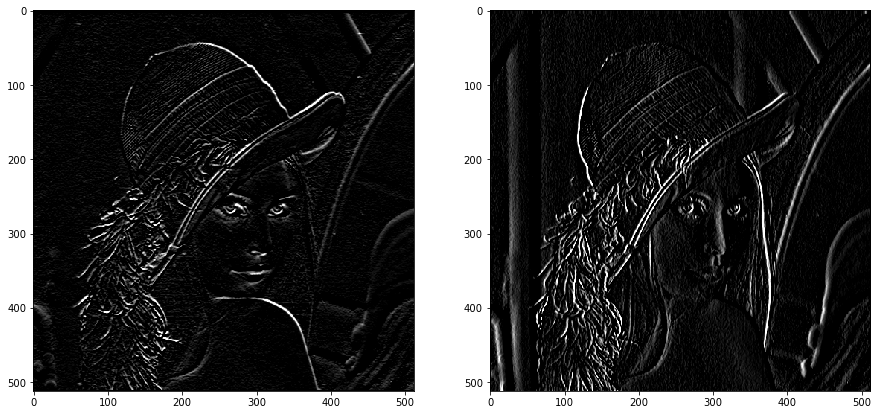


What are these mysterious kernels do in your opinion?
Ans: Detect horizontal edges and vertical edges respectively.



In [13]:
xKernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # Mysterious Kernel?
yKernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter2DOutput1 = cv2.filter2D(inputImage,-1,xKernel)
filter2DOutput2 = cv2.filter2D(inputImage,-1,yKernel)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(filter2DOutput1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filter2DOutput2, cmap='gray')
plt.show()

print('''
What are these mysterious kernels do in your opinion?
Ans: Detect horizontal edges and vertical edges respectively.
''')

## Assignment 2 - Which filter is the best?
The provided api are generated the random artificial noise into image. Your task is to implement the best way <b>(in your opinion)</b> to remove/eliminate those noise. Don't forget to state your reason in the following block. Answer can be in Thai or English.

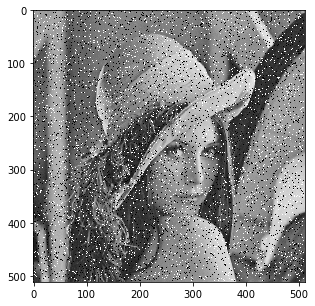

uint8


In [14]:
out1 = cv2.imread('./assets/Lab2-noise1.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(out1, cmap='gray')
plt.show()
print(out1.dtype)

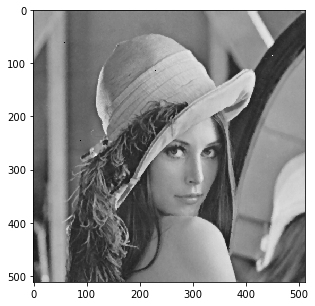


Because the noise is scattered quite apart and evenly,
so we can smoothen the image by using the median filter.



In [15]:
### FILL HERE ###
reducedNoiseImage = cv2.medianBlur(out1, 3)
plt.figure(figsize=(5,5))
plt.imshow(reducedNoiseImage, cmap='gray')
plt.show()
#################
print('''
Because the noise is scattered quite apart and evenly,
so we can smoothen the image by using the median filter.
''')

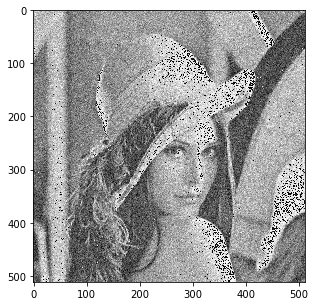

In [16]:
out2 = cv2.imread('./assets/Lab2-noise2.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(out2, cmap='gray')
plt.show()

In [17]:
### FILL HERE ###

def cv2MyFilters(d, sigmaColor, sigmaSpace, aperture, threshold):
    copied = np.copy(out2)
    size = aperture//2
    height, width = copied.shape[0],copied.shape[1]
    
    #Removing black dots
    padded = np.pad(copied, pad_width=size, mode='constant', constant_values=255)
    for i,j in np.ndindex(copied.shape):
        x,y = i+size, j+size
        if(padded[x,y] <= threshold):
            padded[x,y] = np.median(padded[x-size:x+size+1,y-size:y+size+1])

    #Cropped and applied bilateral filter
    cropped = np.array(padded[size:size+height,size:size+width],dtype='uint8')
    cropped = cv2.bilateralFilter(cropped,d,sigmaColor,sigmaSpace)
    
    plt.figure(figsize=(5,5))
    plt.imshow(cropped,cmap='gray')
    plt.show()

interact(cv2MyFilters,
         d = widgets.IntSlider(min=1,max=15,value=1),
         sigmaColor = widgets.IntSlider(min=1,max=100,value=1),
         sigmaSpace = widgets.IntSlider(min=1,max=100,value=1),
         aperture = widgets.IntSlider(min=1,max=9,step=2,value=1),
         threshold = widgets.IntSlider(min=0,max=255,value=1))
#################
print('''
Reduced black dot in image by choosing median from each iteration,
and applied bilateral filter for smoothen the image.
''')

interactive(children=(IntSlider(value=1, description='d', max=15, min=1), IntSlider(value=1, description='sigm…


Reduced black dot in image by choosing median from each iteration,
and applied bilateral filter for smoothen the image.



## Assignment 3 - Implementing your own filter2D function
![title](assets/Lab2-filter2D.png)

In this part, you will implement the image filter function by yourself. This function should have the function signature as shown below.
```python
def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    if paddingMethod == "constant":
        Myterious operations A
    elif paddingMethod == "replicate":
        Myterious operations B
    elif paddingMethod == "valid":
        Myterious operations C
    else
        print("Undefined padding method")
    return outputImage
```
You must implement 3 padding method
1. Constant ("constant")
2. Replicate border value ("replicate")
3. No Padding ("valid")

<b>Hint</b>: Numpy has a padding function! Use Google!!!

In [92]:
### FILL HERE ###
def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    img = np.copy(inputImage)
    h, w = inputImage.shape
    m, n = kernel.shape
    a = (m - 1) // 2
    b = m // 2
    c = (n - 1) // 2
    d = n // 2
    y, x = h, w
    img2 = np.zeros((h,w))
    if paddingMethod == "constant":
        img = np.pad(img,pad_width=((a,b),(c,d)),mode="constant",constant_values=paddingValue)
    elif paddingMethod == "replicate":
        img = np.pad(img,pad_width=((a,b),(c,d)), mode="edge")
    elif paddingMethod == "valid":
        y, x = h-a-b, w-c-d
    img2 = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            q, r, s, t = i, i+a+b, j, j+c+d
            img2[i,j] = np.sum(img[q:r+1, s:t+1]*kernel)
    return img2   

In [93]:
before = np.arange(49).reshape(7,7).astype('float')
print("before:\n",before)
print("constant (5):\n",myFilter2D(before,np.full((5,5),1/25),paddingMethod="constant",paddingValue=5))
print("replicate:\n",myFilter2D(before,np.full((5,5),1/25),paddingMethod="replicate"))
print("valid:\n",myFilter2D(before,np.full((5,5),1/25),paddingMethod="valid"))

before:
 [[ 0.  1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12. 13.]
 [14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27.]
 [28. 29. 30. 31. 32. 33. 34.]
 [35. 36. 37. 38. 39. 40. 41.]
 [42. 43. 44. 45. 46. 47. 48.]]
constant (5):
 [[ 6.08  6.68  7.4   8.    8.6   8.12  7.52]
 [ 8.12  9.48 11.   11.8  12.6  11.4  10.04]
 [11.   13.4  16.   17.   18.   15.8  13.4 ]
 [15.2  19.   23.   24.   25.   21.4  17.6 ]
 [19.4  24.6  30.   31.   32.   27.   21.8 ]
 [18.2  22.92 27.8  28.6  29.4  24.84 20.12]
 [16.16 20.12 24.2  24.8  25.4  21.56 17.6 ]]
replicate:
 [[ 4.8  5.4  6.2  7.2  8.2  9.   9.6]
 [ 9.   9.6 10.4 11.4 12.4 13.2 13.8]
 [14.6 15.2 16.  17.  18.  18.8 19.4]
 [21.6 22.2 23.  24.  25.  25.8 26.4]
 [28.6 29.2 30.  31.  32.  32.8 33.4]
 [34.2 34.8 35.6 36.6 37.6 38.4 39. ]
 [38.4 39.  39.8 40.8 41.8 42.6 43.2]]
valid:
 [[16. 17. 18.]
 [23. 24. 25.]
 [30. 31. 32.]]


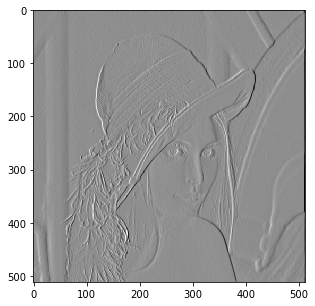

In [87]:
plt.figure(figsize=(5,5))
plt.imshow(myFilter2D(inputImage,np.array([[-1,0,1],[-2,0,2],[-1,0,1]])),cmap='gray')
plt.show()

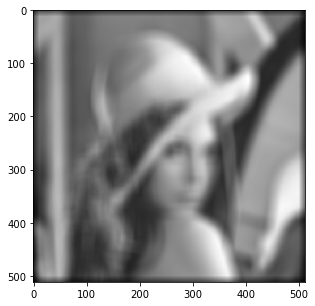

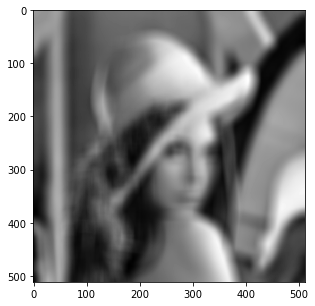

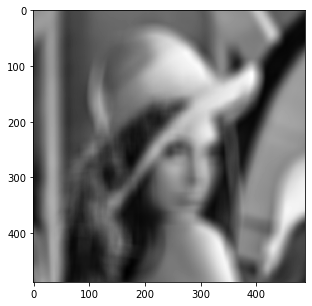

In [88]:
plt.figure(figsize=(5,5))
plt.imshow(myFilter2D(inputImage,np.full((25,25),1/625)),cmap="gray")
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(myFilter2D(inputImage,np.full((25,25),1/625),"replicate"),cmap="gray")
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(myFilter2D(inputImage,np.full((25,25),1/625),"valid"),cmap="gray")
plt.show()